NameError: name 'df' is not defined

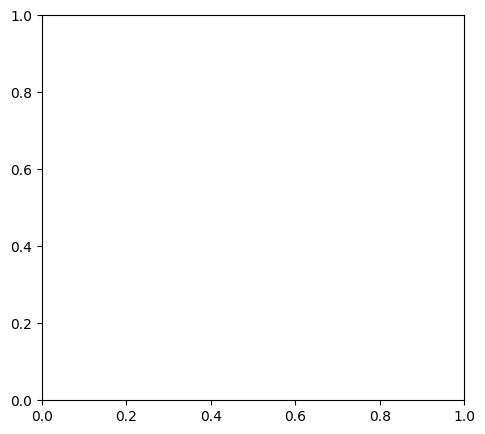

In [1]:
# Let's visualize our class imbalance and model performance
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Class Distribution Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
class_counts = df.label.value_counts()
sns.barplot(x=class_counts.index.astype(str), y=class_counts.values)
plt.title("Class Distribution in Full Dataset")
plt.xlabel("Class (0=Non-Transit, 1=Transit)")
plt.ylabel("Count")

for i, count in enumerate(class_counts.values):
    plt.text(i, count+500, f"{count}", ha='center')

# Add percentage labels
total = sum(class_counts)
for i, count in enumerate(class_counts.values):
    percentage = count / total * 100
    plt.text(i, count/2, f"{percentage:.1f}%", ha='center', color='white', fontweight='bold')

# 2. Confusion Matrix with Normalization
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_normalized, annot=cm, fmt='d', cmap='Blues',
            xticklabels=['Non-Transit', 'Transit'],
            yticklabels=['Non-Transit', 'Transit'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()

# 3. Feature Importance
plt.figure(figsize=(10, 6))
feature_names = ["local_noise", "width", "symmetry", "local_slope", 
                 "window_ratio", "snr", "best_power"]
importances = pipe.named_steps['clf'].feature_importances_
indices = np.argsort(importances)[::-1]

plt.title('Feature Importances')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()

# 4. Print key ratios
print(f"Class imbalance ratio: 1:{class_counts[0]/class_counts[1]:.1f}")
print(f"Percentage of transits: {class_counts[1]/total*100:.2f}%")
print(f"True positive rate: {cm[1,1]/sum(cm[1,:]):.2f}")
print(f"False positive rate: {cm[0,1]/sum(cm[0,:]):.4f}")